## Importação das bibliotecas

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

tf.__version__

'2.10.0'

## Carregamento das imagens

In [19]:
path = 'C:/Users/Windows 10/Desktop/projeto_final/cat_dog_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

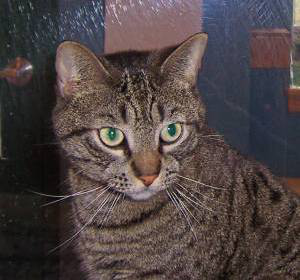

In [20]:
tf.keras.preprocessing.image.load_img('C:/Users/Windows 10/Desktop/projeto_final/cat_dog_2/training_set/cat/cat.1.jpg')

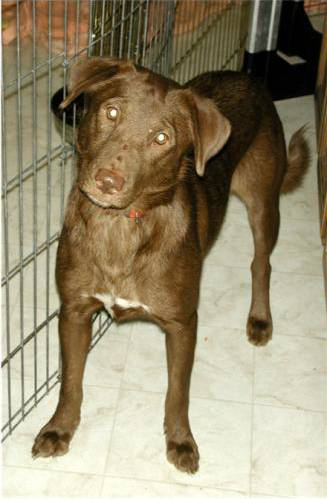

In [21]:
tf.keras.preprocessing.image.load_img('C:/Users/Windows 10/Desktop/projeto_final/cat_dog_2/training_set/dog/dog.1.jpg')

## Base de treinamento e teste

In [22]:
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
dataset_treinamento = gerador_treinamento.flow_from_directory('C:/Users/Windows 10/Desktop/projeto_final/cat_dog_2/training_set',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 4000 images belonging to 2 classes.


In [23]:
dataset_treinamento.classes

array([0, 0, 0, ..., 1, 1, 1])

In [24]:
dataset_treinamento.class_indices

{'cat': 0, 'dog': 1}

In [25]:
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory('C:/Users/Windows 10/Desktop/projeto_final/cat_dog_2/test_set',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 1000 images belonging to 2 classes.


## Construção e treinamento da rede neural

In [ ]:
network = Sequential()

# 1ª camada de convolução
network.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))

# 2ª camada de convolução
network.add(Conv2D(64, (3,3), activation='relu'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))

# Camadas Densas
network.add(Flatten())
network.add(Dense(512, activation='relu'))
network.add(Dropout(0.5))
network.add(Dense(512, activation='relu'))
network.add(Dropout(0.5))

network.add(Dense(2, activation='softmax'))

optimizer = Adam(learning_rate=0.001)


In [27]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_2 (Batc  (None, 62, 62, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 29, 29, 64)       256       
 hNormalization)                                                 
                                                      

In [28]:
network.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics = ['accuracy'])

In [29]:
historico = network.fit(dataset_treinamento, epochs=50)

Epoch 1/50
125/125 [==============================] - 68s 530ms/step - loss: 2.5363 - accuracy: 0.5530
Epoch 2/50
125/125 [==============================] - 34s 269ms/step - loss: 0.9384 - accuracy: 0.5907
Epoch 3/50
125/125 [==============================] - 35s 279ms/step - loss: 0.7379 - accuracy: 0.6077
Epoch 4/50
125/125 [==============================] - 60s 480ms/step - loss: 0.6708 - accuracy: 0.6352
Epoch 5/50
125/125 [==============================] - 39s 308ms/step - loss: 0.6389 - accuracy: 0.6460
Epoch 6/50
125/125 [==============================] - 36s 285ms/step - loss: 0.6157 - accuracy: 0.6662
Epoch 7/50
125/125 [==============================] - 35s 278ms/step - loss: 0.5894 - accuracy: 0.6935
Epoch 8/50
125/125 [==============================] - 35s 280ms/step - loss: 0.5839 - accuracy: 0.6877
Epoch 9/50
125/125 [==============================] - 35s 280ms/step - loss: 0.5592 - accuracy: 0.6975
Epoch 10/50
125/125 [==============================] - 35s 276ms/step - l

## Avaliação da rede neural

In [47]:
dataset_teste.class_indices

{'cat': 0, 'dog': 1}

In [48]:
previsoes = network.predict(dataset_teste)
previsoes

1000/1000 [==============================] - 6s 6ms/step


array([[0.9272795 , 0.07272052],
       [0.2411286 , 0.75887144],
       [0.8314202 , 0.1685798 ],
       ...,
       [0.03683611, 0.96316385],
       [0.5744169 , 0.4255831 ],
       [0.00813069, 0.99186933]], dtype=float32)

In [49]:
previsoes = np.argmax(previsoes, axis = 1)
previsoes

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
dataset_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset_teste.classes, previsoes)

0.791

In [53]:
dataset_teste.class_indices

{'cat': 0, 'dog': 1}

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)
cm

array([[402,  98],
       [111, 389]], dtype=int64)

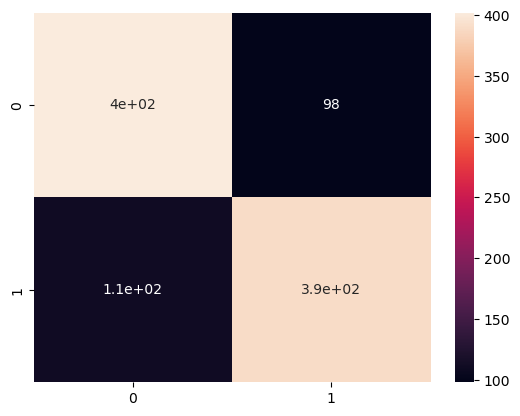

In [55]:
sns.heatmap(cm, annot=True);

In [38]:
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       500
           1       0.80      0.78      0.79       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



## Salvar e carregar a rede neural

In [39]:
model_json = network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

In [40]:
from tensorflow.keras.models import save_model
network_saved = save_model(network, 'C:/Users/Windows 10/Desktop/projeto_final/weights.hdf5')

In [41]:
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_2_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_2", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization_2", "trainable": true, "dtype": "float32", "axis": [3], "momentum": 0.99, "epsilon": 

In [42]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [43]:
network_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_2 (Batc  (None, 62, 62, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 29, 29, 64)       256       
 hNormalization)                                                 
                                                      

## Classificação de uma única imagem

In [100]:
imagem = cv2.imread('C:/Users/Windows 10/Desktop/projeto_final/cat_dog_2/test_set/dog/dog.3971.jpg')

In [102]:
imagem = cv2.resize(imagem, (64, 64))
# cv2.imshow('imagem', imagem)

In [103]:
imagem = imagem / 255
imagem

array([[[0.70196078, 0.68235294, 0.66666667],
        [0.73333333, 0.7254902 , 0.68627451],
        [0.72156863, 0.70196078, 0.69019608],
        ...,
        [0.71764706, 0.70980392, 0.66666667],
        [0.70980392, 0.70196078, 0.65882353],
        [0.70196078, 0.69019608, 0.64705882]],

       [[0.72941176, 0.71372549, 0.69803922],
        [0.72941176, 0.72156863, 0.68235294],
        [0.7372549 , 0.71764706, 0.70588235],
        ...,
        [0.71372549, 0.70588235, 0.6627451 ],
        [0.70980392, 0.70196078, 0.65490196],
        [0.69411765, 0.67843137, 0.63529412]],

       [[0.72941176, 0.70980392, 0.69411765],
        [0.73333333, 0.7254902 , 0.68627451],
        [0.7372549 , 0.71764706, 0.70588235],
        ...,
        [0.70980392, 0.70196078, 0.65882353],
        [0.71764706, 0.70980392, 0.66666667],
        [0.70196078, 0.68627451, 0.64313725]],

       ...,

       [[0.62352941, 0.61568627, 0.61176471],
        [0.60392157, 0.60392157, 0.56862745],
        [0.61960784, 0

In [104]:
imagem.shape

(64, 64, 3)

In [105]:
imagem = imagem.reshape(-1, 64, 64, 3)
imagem.shape

(1, 64, 64, 3)

In [106]:
resultado = network_loaded(imagem)
resultado

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.00160517, 0.9983948 ]], dtype=float32)>

In [107]:
resultado = np.argmax(resultado)
resultado

1

In [108]:
dataset_teste.class_indices

{'cat': 0, 'dog': 1}

In [109]:
if resultado == 0:
  print('Gato')
else:
  print('Cachorro')

Cachorro
